# Data Extraction

In [20]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline
import pandas as pd
from src.data_extraction.data_extraction import extract_initial_data
from src.constants import (
    NEW_COLUMNS_NAMES,
    REMOVE_COLUMNS_BY_INPUT,
    NUM_VARIABLES_TO_SEE_DISTRIBUTION,
    BINARY_VARIABLES,
)
from src.preprocessing.preprocessing_utils import (
    generate_pandas_profiling_report,
    remove_duplicated_anuncios_id,
    find_single_value_columns,
    treatment_missing_values,
    visualize_distribution,
    visualize_binary_distribution,
    correlation_values,
    feature_engineering,
    get_location_name_w_gdf,
)

## Extract all dataset available, provided by idealista

In [21]:
df_assets, df_ine, df_osm, df_pois, df_polygons = extract_initial_data(
    root_dir="input_data"
)

## ASSETS - Basis

In [22]:
# Change columns names to friendly ones
df_assets = df_assets.drop(columns=["ADTYPOLOGY", "ADOPERATION"])
df_assets.columns = NEW_COLUMNS_NAMES

Summarize dataset:  99%|█████████▊| 338/343 [00:40<00:01,  4.16it/s, Missing diagram heatmap]                           c:\Users\aimartins\OneDrive - Parfois, SA\Desktop\MDS6\MDS6-IDEALISTA\.venv\lib\site-packages\ydata_profiling\model\missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '--'')
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 17.49it/s]


Profile report saved to: c:\Users\aimartins\OneDrive - Parfois, SA\Desktop\MDS6\MDS6-IDEALISTA\src\preprocessing\..\data_visualization\profile_report.html


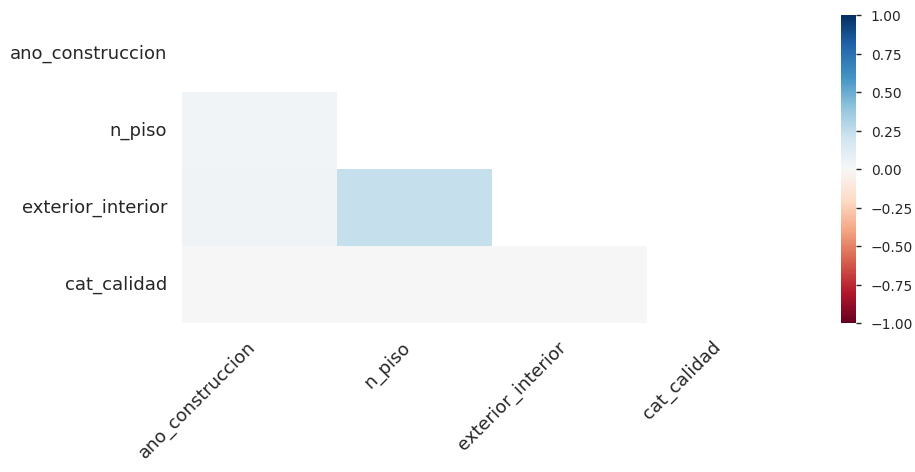

In [23]:
# Generate pandas profiling
#FIXME: uncomment before commit
# generate_pandas_profiling_report(df=df_assets)

In [24]:
# See general statistics of df
description_df = df_assets.describe().transpose()
description_df

,count,mean,std,min,25%,50%,75%,max
fecha,94815.0,201808.613289,3.684625,201803.000000,201806.000000,201809.000000,201812.000000,2.018120e+05
precio,94815.0,396110.109160,417074.407623,21000.000000,160000.000000,262000.000000,467000.000000,8.133000e+06
precio_unitario_km2,94815.0,3661.051534,1700.499398,805.309735,2240.000000,3480.000000,4744.623034,9.997561e+03
area_construida,94815.0,101.397163,67.078259,21.000000,62.000000,83.000000,117.000000,9.850000e+02
n_habitaciones,94815.0,2.580900,1.244878,0.000000,2.000000,3.000000,3.000000,9.300000e+01
n_banos,94815.0,1.585456,0.843024,0.000000,1.000000,1.000000,2.000000,2.000000e+01
terraza,94815.0,0.355260,0.478595,0.000000,0.000000,0.000000,1.000000,1.000000e+00
ascensor,94815.0,0.695597,0.460157,0.000000,0.000000,1.000000,1.000000,1.000000e+00
aire_acondicionado,94815.0,0.448600,0.497354,0.000000,0.000000,0.000000,1.000000,1.000000e+00
amueblado,94815.0,2.922660,0.314865,1.000000,3.000000,3.000000,3.000000,3.000000e+00


In [25]:
# Remove duplicated anuncios_id
df_assets = remove_duplicated_anuncios_id(df_assets=df_assets, criteria="last")

All duplicated id_anuncio values are associated with the same fecha.


In [26]:
# Remove columns by input
df_assets = df_assets.drop(columns=REMOVE_COLUMNS_BY_INPUT)
print('Removed columns:', REMOVE_COLUMNS_BY_INPUT)

Removed columns: ['fecha', 'precio_unitario_km2', 'id_anuncio']


In [27]:
# Remove columns that only have one different value
remove_unique_value_columns = find_single_value_columns(df=df_assets)
df_assets = df_assets.drop(columns=remove_unique_value_columns)

Columns with only one distinct value: ['tipologia_imueble', 'operacion', 'ciudad']


### Missing Values

In [28]:
# Missing values
remove_columns_by_missing_values, df_assets = treatment_missing_values(df=df_assets)

Columns with missing values: Index(['ano_construccion', 'n_piso', 'exterior_interior', 'cat_calidad'], dtype='object')
ano_construccion: 59.95%
n_piso: 4.05%
exterior_interior: 6.79%
cat_calidad: 0.00%
Percentage of rows affected by dropping NaN values:", 0.09339876523666298


### Feature Engineering

In [29]:
# Feature Engineering: add new variables
(
    add_columns,
    remove_columns_by_creating_new_variables,
    df_assets,
) = feature_engineering(df=df_assets)

print("Columns added:", add_columns)
print('Columns removed by adding new:', remove_columns_by_creating_new_variables)

Columns added: ['interior', 'status_inmueble', 'antiguidade']
Columns removed by adding new: ['cat_ano_construccion', 'nueva_construccion', 'buen_estado', 'a_reformar', 'exterior_interior']


### Correlations

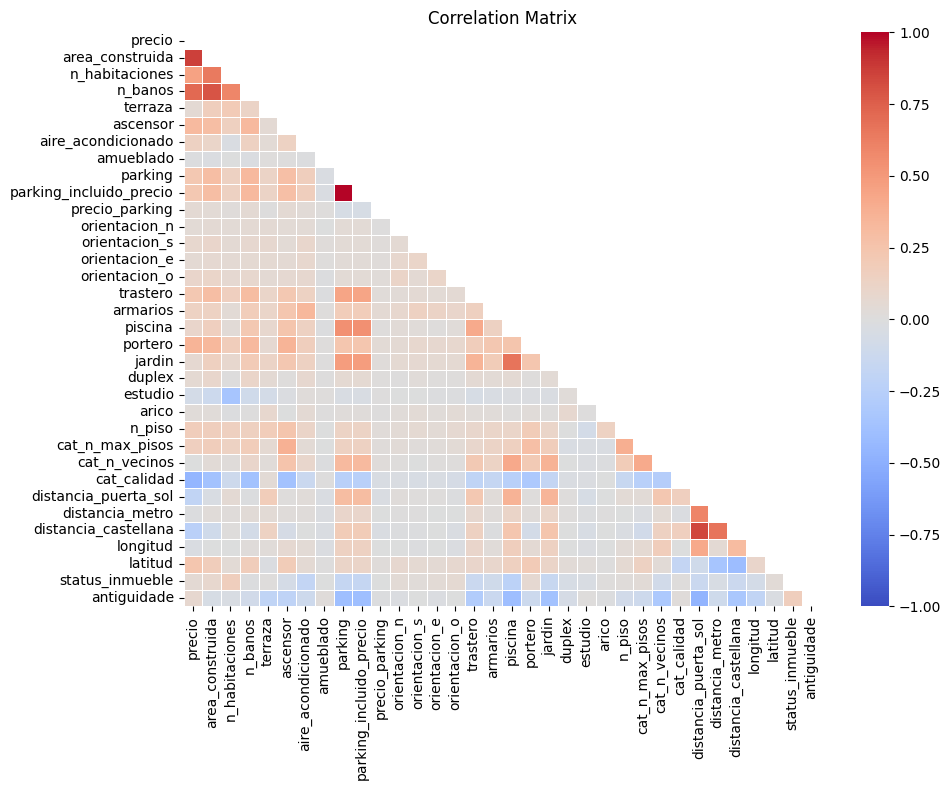

Correlated variables: precio, area_construida, Correlation: 0.8606170615020835
Correlated variables: parking, parking_incluido_precio, Correlation: 1.0
Correlated variables: distancia_puerta_sol, distancia_castellana, Correlation: 0.8363651289269339


In [30]:
# Correlation values
correlation_matrix, correlated_variables = correlation_values(df=df_assets, threshold=0.8)

### Visualizations

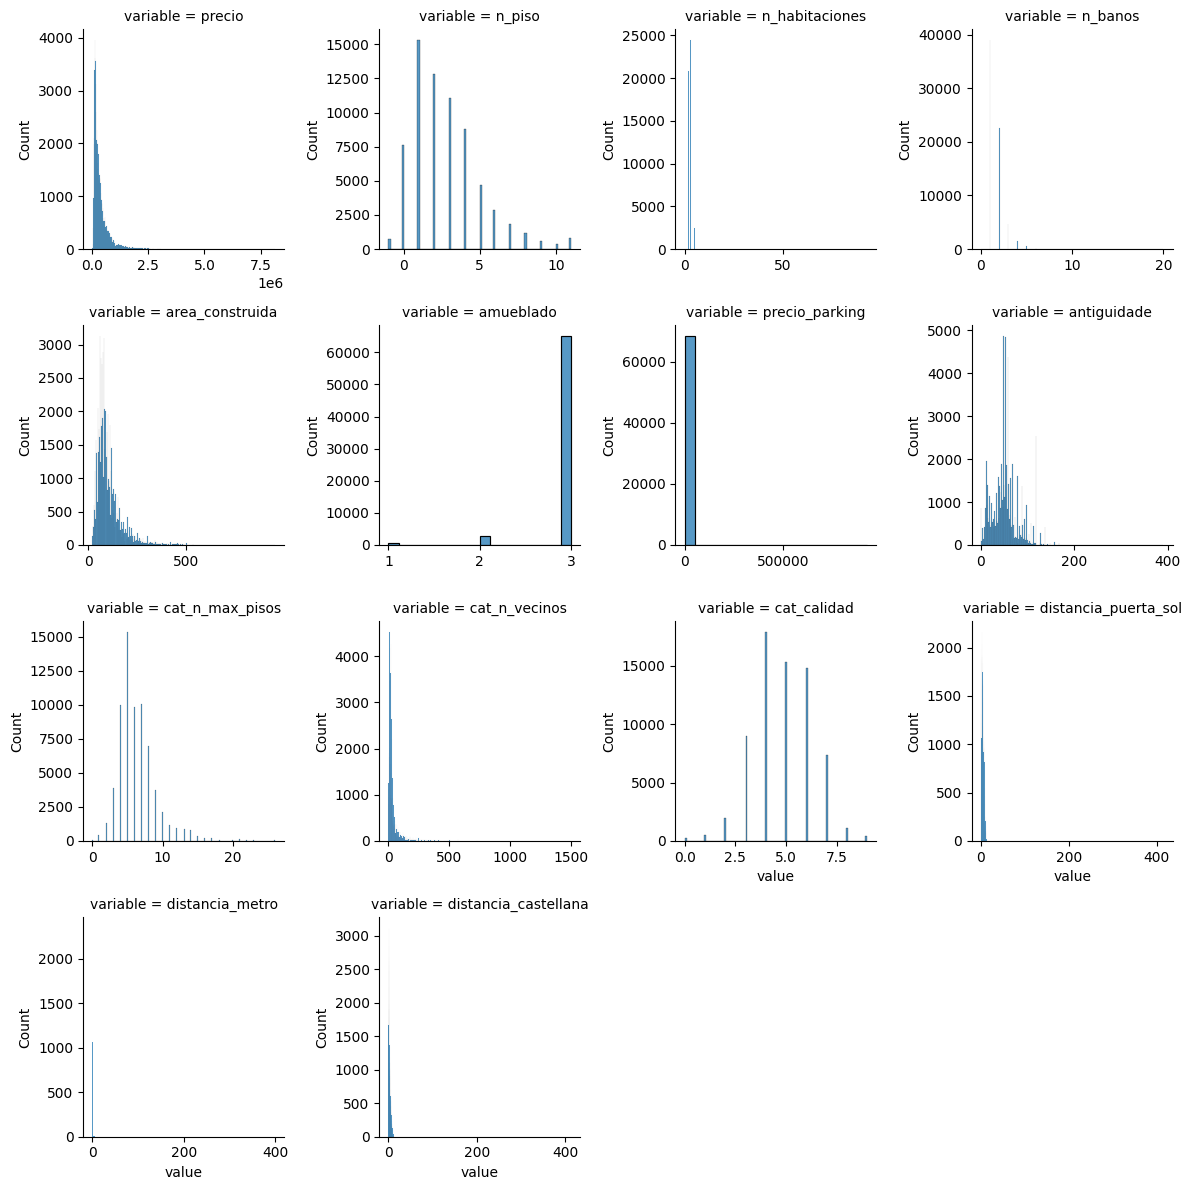

<Figure size 640x480 with 0 Axes>

In [19]:
visualize_distribution(
    df=df_assets, numerical_columns=NUM_VARIABLES_TO_SEE_DISTRIBUTION
)
